In [2]:
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import numpy as np
import cython
import math
from scipy.io.wavfile import write, read
from scipy.fftpack import fft, ifft
from scipy.signal import triang
from scipy.signal import get_window
import copy

# Part 1 - Triangular function FFT

In [3]:
x = triang(15) # 15 samples
X= fft(x) 
X

array([ 8.00000000e+00-0.j        , -2.79759784e+00-0.59464778j,
        2.98381159e-02+0.01328479j, -2.64754249e-01-0.19235522j,
        2.50553568e-02+0.02782679j, -6.25000000e-02-0.10825318j,
        1.47542486e-02+0.04540891j, -7.29562994e-03-0.06941328j,
       -7.29562994e-03+0.06941328j,  1.47542486e-02-0.04540891j,
       -6.25000000e-02+0.10825318j,  2.50553568e-02-0.02782679j,
       -2.64754249e-01+0.19235522j,  2.98381159e-02-0.01328479j,
       -2.79759784e+00+0.59464778j])

In [4]:
mX= abs(X)
mX

array([8.        , 2.86009784, 0.03266188, 0.32725425, 0.03744464,
       0.125     , 0.04774575, 0.06979563, 0.06979563, 0.04774575,
       0.125     , 0.03744464, 0.32725425, 0.03266188, 2.86009784])

In [5]:
pX = np.angle(X)
pX

array([-0.        , -2.93215314,  0.41887902, -2.51327412,  0.83775804,
       -2.0943951 ,  1.25663706, -1.67551608,  1.67551608, -1.25663706,
        2.0943951 , -0.83775804,  2.51327412, -0.41887902,  2.93215314])

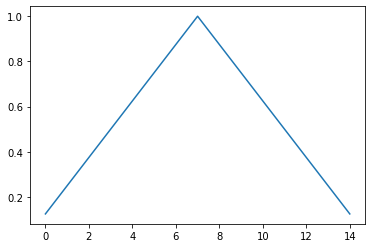

In [6]:
plt.plot(x)

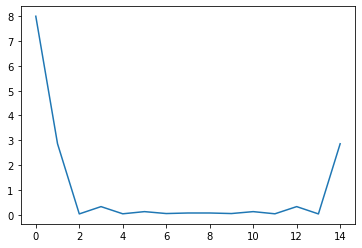

In [7]:
plt.plot(mX)  # Note this has to be symmetric; 0-7 is one postive part and 8-14 is negative part

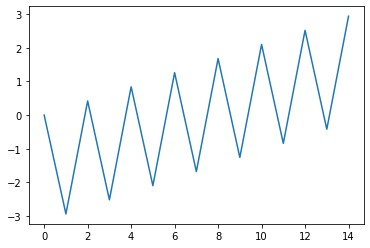

In [8]:
plt.plot(pX)  # The phase is not zero because the triangular function wasnt centered around zero

# Part 2: Triangular function around Zero 

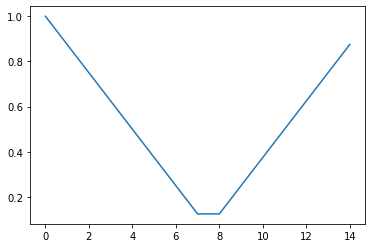

In [9]:
x = triang(15) # 15 samples

# center the funciton around zero
fftbuffer = np.zeros(15)
fftbuffer[:8] = x[7:]
fftbuffer[8:]= x[:7]

plt.plot(fftbuffer)

In [10]:
#compute fft on centered function
X= fft(fftbuffer) 
X

array([8.        -0.00000000e+00j, 2.86009784-1.11022302e-16j,
       0.03266188+2.77555756e-17j, 0.32725425+4.99333382e-17j,
       0.03744464+4.06369831e-17j, 0.125     +0.00000000e+00j,
       0.04774575+1.51659286e-16j, 0.06979563+2.21777626e-17j,
       0.06979563-2.21777626e-17j, 0.04774575-1.51659286e-16j,
       0.125     -0.00000000e+00j, 0.03744464-4.06369831e-17j,
       0.32725425-4.99333382e-17j, 0.03266188-2.77555756e-17j,
       2.86009784+1.11022302e-16j])

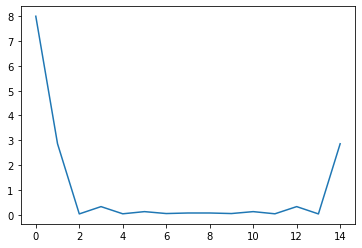

In [11]:
mX= abs(X)
plt.plot(mX)   # since it is just a shifting operation, the magnitude did not change

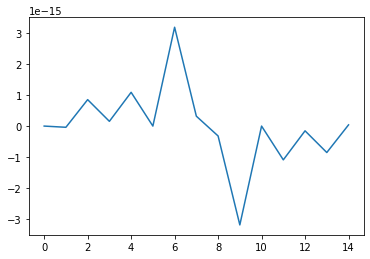

In [12]:
pX = np.angle(X)
plt.plot(pX) # These all values are zeros 

# Part3-Analysis of Real Signal

In [13]:
# Function to read the wav file
INT16_FAC = (2**15)-1
INT32_FAC = (2**31)-1
INT64_FAC = (2**63)-1
norm_fact = {'int16':INT16_FAC, 'int32':INT32_FAC, 'int64':INT64_FAC,'float32':1.0,'float64':1.0}

def wavread(filename):
    
	"""
	Read a sound file and convert it to a normalized floating point array
	filename: name of file to read
	returns fs: sampling rate of file, x: floating point array
	"""

	fs,x = read(filename)

	if(len(x.shape) !=1):                                   # raise error if more than one channel
		raise ValueError("Audio file should be mono")

	#if (fs !=44100):                                         # raise error if more than one channel
	#	raise ValueError("Sampling rate of input sound should be 44100")

	#scale down and convert audio into floating point number in range of -1 to 1
	x = np.float32(x)/norm_fact[x.dtype.name]
	return fs, x




In [14]:
def wavwrite(y, fs, filename):
	"""
	Write a sound file from an array with the sound and the sampling rate
	y: floating point array of one dimension, fs: sampling rate
	filename: name of file to create
	"""

	x = copy.deepcopy(y)                         # copy array
	x *= INT16_FAC                               # scaling floating point -1 to 1 range signal to int16 range
	x = np.int16(x)                              # converting to int16 type
	write(filename, fs, x)

In [15]:
fx,x = wavread("for_experiment.wav")

In [16]:
#defining Samples and variables to center it
M= 501
hm1=int(math.floor((M+1)/2))
hm2=int(math.floor(M/2))

In [17]:
#create a sample from the input
x1= x[5000:5000+M]*np.hamming(M)  # taking from 5000th sample and multiply by smoothing window

In [18]:
#center the code in fftbuffer
N=511
fftbuffer = np.zeros(N)
fftbuffer[:hm1]= x1[hm2:]
fftbuffer[N-hm2:]= x1[:hm2]

In [19]:
#fast fourier transform
X = fft(fftbuffer)
mX= abs(X)
pX = np.angle(X)

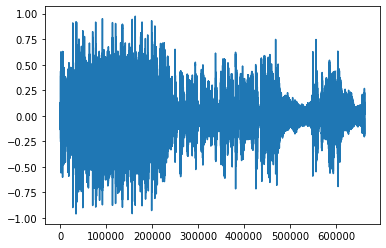

In [20]:
plt.plot(x)

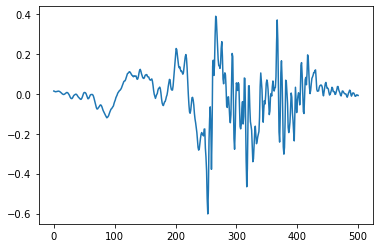

In [21]:
plt.plot(x1)

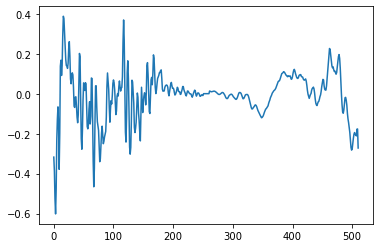

In [22]:
plt.plot(fftbuffer)

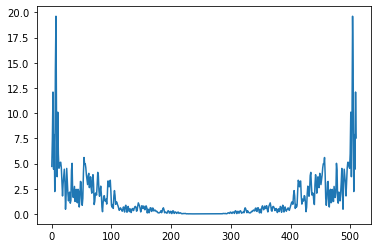

In [23]:
plt.plot(mX)  # Symmetric from the middle as expected

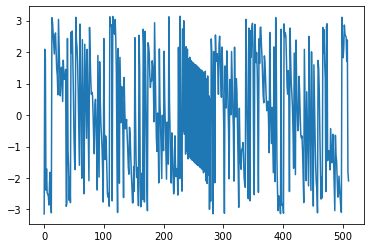

In [24]:
plt.plot(pX)  # anti symmetric or oDD ; FIrst half is negative value of second half

In [25]:
# NOTE to use the FFT algorithm, we need to use N as power of 2

In [26]:
#center the code in fftbuffer
N=1024  # it is now power of 2
fftbuffer = np.zeros(N)
fftbuffer[:hm1]= x1[hm2:]
fftbuffer[N-hm2:]= x1[:hm2]

In [27]:
#fast fourier transform
X = fft(fftbuffer)
mX= abs(X)
pX = np.angle(X)

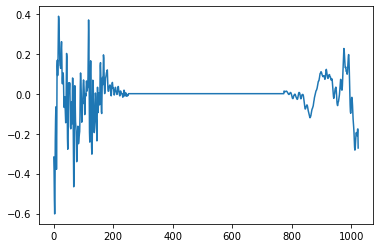

In [28]:
plt.plot(fftbuffer)    # middle are zeros i.e. it is zero padding

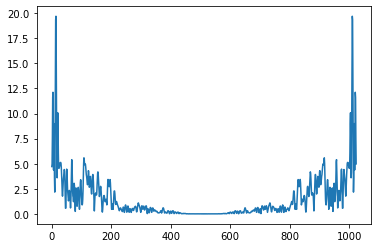

In [29]:
plt.plot(mX)  # Symmetric from the middle as expected

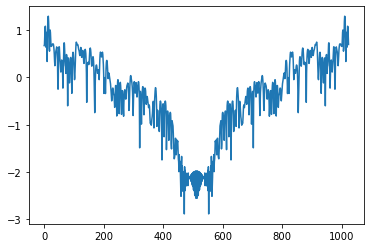

In [30]:
#lets plot the abs value in decibels 
mX= np.log10(abs(X))
plt.plot(mX)

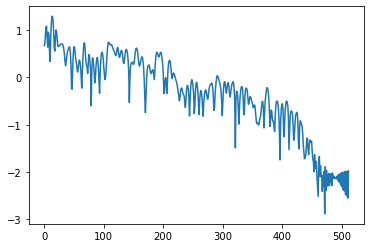

In [31]:
plt.plot(mX[0:int(N/2)]) # only plotting the half

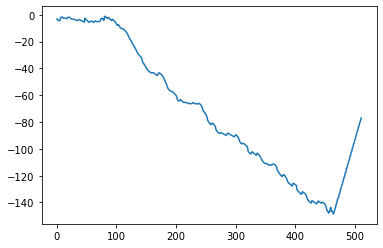

In [32]:
pX = np.unwrap(np.angle(X)) #unwrapping the phase
plt.plot(pX[0:512])  # again only the first half

# DFT

In [33]:
tol = 1e-14 
def dftModel(x, w, N):
	"""
	Analysis/synthesis of a signal using the discrete Fourier transform
	x: input signal, w: analysis window, N: FFT size
	returns y: output signal
	"""

	if not(isPower2(N)):                                 # raise error if N not a power of two
		raise ValueError("FFT size (N) is not a power of 2")

	if (w.size > N):                                        # raise error if window size bigger than fft size
		raise ValueError("Window size (M) is bigger than FFT size")

	if all(x==0):                                           # if input array is zeros return empty output
		return np.zeros(x.size)
	hN = (N//2)+1                                           # size of positive spectrum, it includes sample 0
	hM1 = (w.size+1)//2                                     # half analysis window size by rounding
	hM2 = int(math.floor(w.size/2))                         # half analysis window size by floor
	fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
	y = np.zeros(x.size)                                    # initialize output array
	#----analysis--------
	xw = x*w                                                # window the input sound
	fftbuffer[:hM1] = xw[hM2:]                              # zero-phase window in fftbuffer
	fftbuffer[-hM2:] = xw[:hM2]        
	X = fft(fftbuffer)                                      # compute FFT
	absX = abs(X[:hN])                                      # compute ansolute value of positive side
	absX[absX<np.finfo(float).eps] = np.finfo(float).eps    # if zeros add epsilon to handle log
	mX = 20 * np.log10(absX)                                # magnitude spectrum of positive frequencies in dB     
	pX = np.unwrap(np.angle(X[:hN]))                        # unwrapped phase spectrum of positive frequencies
	#-----synthesis-----
	Y = np.zeros(N, dtype = complex)                        # clean output spectrum
	Y[:hN] = 10**(mX/20) * np.exp(1j*pX)                    # generate positive frequencies
	Y[hN:] = 10**(mX[-2:0:-1]/20) * np.exp(-1j*pX[-2:0:-1]) # generate negative frequencies
	fftbuffer = np.real(ifft(Y))                            # compute inverse FFT
	y[:hM2] = fftbuffer[-hM2:]                              # undo zero-phase window
	y[hM2:] = fftbuffer[:hM1]
	return y

In [34]:
def dftAnal(x, w, N):
	"""
	Analysis of a signal using the discrete Fourier transform
	x: input signal, w: analysis window, N: FFT size 
	returns mX, pX: magnitude and phase spectrum
	"""

	if not(isPower2(N)):                                 # raise error if N not a power of two
		raise ValueError("FFT size (N) is not a power of 2")

	if (w.size > N):                                        # raise error if window size bigger than fft size
		raise ValueError("Window size (M) is bigger than FFT size")

	hN = (N//2)+1                                           # size of positive spectrum, it includes sample 0
	hM1 = (w.size+1)//2                                     # half analysis window size by rounding
	hM2 = w.size//2                                         # half analysis window size by floor
	fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
	w = w / sum(w)                                          # normalize analysis window
	xw = x*w                                                # window the input sound
	fftbuffer[:hM1] = xw[hM2:]                              # zero-phase window in fftbuffer
	fftbuffer[-hM2:] = xw[:hM2]        
	X = fft(fftbuffer)                                      # compute FFT
	absX = abs(X[:hN])                                      # compute ansolute value of positive side
	absX[absX<np.finfo(float).eps] = np.finfo(float).eps    # if zeros add epsilon to handle log
	mX = 20 * np.log10(absX)                                # magnitude spectrum of positive frequencies in dB
	X[:hN].real[np.abs(X[:hN].real) < tol] = 0.0            # for phase calculation set to 0 the small values
	X[:hN].imag[np.abs(X[:hN].imag) < tol] = 0.0            # for phase calculation set to 0 the small values         
	pX = np.unwrap(np.angle(X[:hN]))                        # unwrapped phase spectrum of positive frequencies
	return mX, pX

In [35]:
def dftSynth(mX, pX, M):
	"""
	Synthesis of a signal using the discrete Fourier transform
	mX: magnitude spectrum, pX: phase spectrum, M: window size
	returns y: output signal
	"""

	hN = mX.size                                            # size of positive spectrum, it includes sample 0
	N = (hN-1)*2                                            # FFT size
	if not(isPower2(N)):                                 # raise error if N not a power of two, thus mX is wrong
		raise ValueError("size of mX is not (N/2)+1")

	hM1 = int(math.floor((M+1)/2))                          # half analysis window size by rounding
	hM2 = int(math.floor(M/2))                              # half analysis window size by floor
	fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
	y = np.zeros(M)                                         # initialize output array
	Y = np.zeros(N, dtype = complex)                        # clean output spectrum
	Y[:hN] = 10**(mX/20) * np.exp(1j*pX)                    # generate positive frequencies
	Y[hN:] = 10**(mX[-2:0:-1]/20) * np.exp(-1j*pX[-2:0:-1]) # generate negative frequencies
	fftbuffer = np.real(ifft(Y))                            # compute inverse FFT
	y[:hM2] = fftbuffer[-hM2:]                              # undo zero-phase window
	y[hM2:] = fftbuffer[:hM1]
	return y

In [36]:
def isPower2(num):
	"""
	Check if num is power of two
	"""
	return ((num & (num - 1)) == 0) and num > 0

#### Test program for the above functions

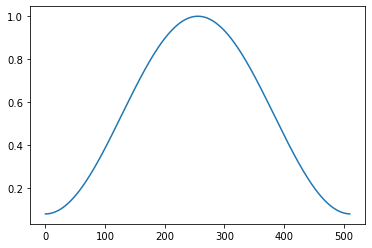

In [37]:
#Read the file
fs,x = wavread("for_experiment.wav")

# Create a Window
M=511
w= get_window("hamming",M)
plt.plot(w)

In [38]:
#get the time period that we are going to analyze
time=0.2   # starting point of the sample to be analyzed
x1= x[int(time*fs):int(time*fs)+M] 

#Implement DFT - analysis
N=1024
mX, pX = dftAnal(x1, w, N)

In [39]:
#implement DFT / IFFT sysnthesis
y=dftSynth(mX, pX, w.size)*sum(w)

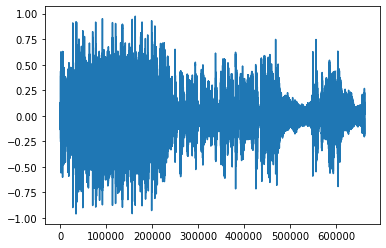

In [40]:
plt.plot(x) # plotting the original signal

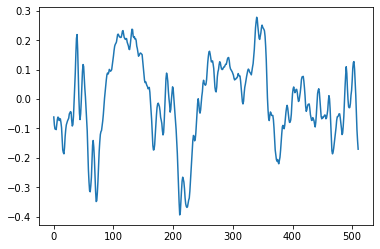

In [41]:
plt.plot(x1) # plotting the fragment

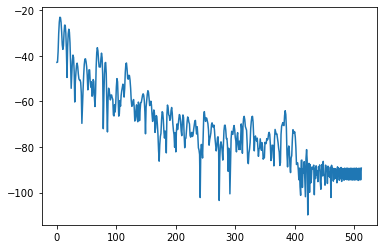

In [42]:
plt.plot(mX) # only positive side 

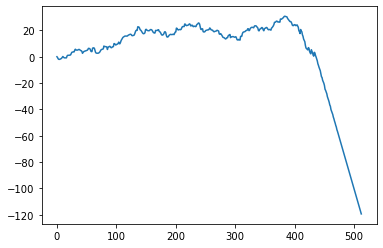

In [43]:
plt.plot(pX) # only positive side 

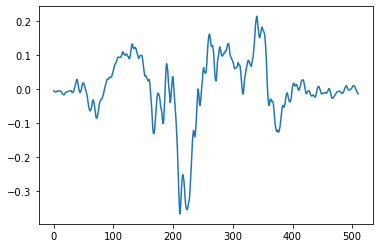

In [44]:
plt.plot(y)  # looks similar to x1

# DFT function - All plots together

In [45]:
def main_dft(inputFile = "for_experiment.wav", window = 'blackman', M = 511, N = 1024, time = .2):
    """
    inputFile: input sound file (monophonic with sampling rate of 44100)
    window: analysis window type (choice of rectangular, hanning, hamming, blackman, blackmanharris)
    M: analysis window size (odd integer value)
    N: fft size (power of two, bigger or equal than than M)
    time: time  to start analysis (in seconds)
    """

    # read input sound (monophonic with sampling rate of 44100)
    fs, x = wavread(inputFile)

    # compute analysis window
    w = get_window(window, M)

    # get a fragment of the input sound of size M
    sample = int(time*fs)
    if (sample+M >= x.size or sample < 0):                          # raise error if time outside of sound
        raise ValueError("Time outside sound boundaries")
    x1 = x[sample:sample+M]

    # compute the dft of the sound fragment
    mX, pX = dftAnal(x1, w, N)

    # compute the inverse dft of the spectrum
    y = dftSynth(mX, pX, w.size)*sum(w)

    # create figure
    plt.figure(figsize=(9, 6))

    # plot the sound fragment
    plt.subplot(4,1,1)
    plt.plot(time + np.arange(M)/float(fs), x1)
    plt.axis([time, time + M/float(fs), min(x1), max(x1)])
    plt.ylabel('amplitude')
    plt.xlabel('time (sec)')
    plt.title('input sound: x')

    # plot the magnitude spectrum
    plt.subplot(4,1,2)
    plt.plot(float(fs)*np.arange(mX.size)/float(N), mX, 'r')
    plt.axis([0, fs/2.0, min(mX), max(mX)])
    plt.title ('magnitude spectrum: mX')
    plt.ylabel('amplitude (dB)')
    plt.xlabel('frequency (Hz)')
    # plot the phase spectrum
    plt.subplot(4,1,3)
    plt.plot(float(fs)*np.arange(pX.size)/float(N), pX, 'c')
    plt.axis([0, fs/2.0, min(pX), max(pX)])
    plt.title ('phase spectrum: pX')
    plt.ylabel('phase (radians)')
    plt.xlabel('frequency (Hz)')

    # plot the sound resulting from the inverse dft
    plt.subplot(4,1,4)
    plt.plot(time + np.arange(M)/float(fs), y)
    plt.axis([time, time + M/float(fs), min(y), max(y)])
    plt.ylabel('amplitude')
    plt.xlabel('time (sec)')
    plt.title('output sound: y')

    plt.tight_layout()
    plt.ion()
    plt.show()

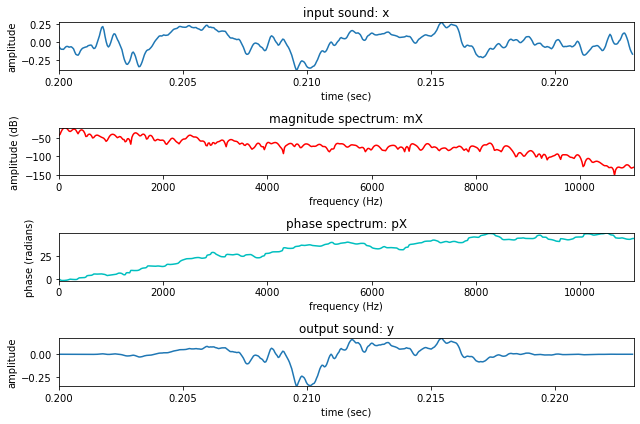

In [46]:
main_dft()

# LECTURE 4 : STFT

# Window - Hanning

In [47]:
# create a window
M=63
window = get_window("hanning",M)
hm1 = int(math.floor((M+1)/2))
hm2= int(math.floor(M/2))


In [48]:
# create an FFT buffer so that you can place the signal at the middle
N=512
hN= int(N/2)
fftbuffer = np.zeros(N)
 
fftbuffer[:hm1]= window[hm2:]  # second half of window place it at begining
fftbuffer[N-hm2:]= window[:hm2] # first half at the end and zero padding in between


In [49]:
# compute fft 
X = fft(fftbuffer)
absx= abs(X)
absx[absx<np.finfo(float).eps] = np.finfo(float).eps  # ensure there are no zeros coz we want to take log
mX = 20*np.log10(absx) # decibels
pX = np.angle(absx)


In [50]:
# to display it properly we undo zero padding and place it in the middle

mX1= np.zeros(N)
pX1= np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN:] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN:] = pX[:hN]


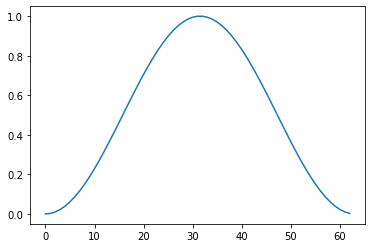

In [51]:
plt.plot(window) 

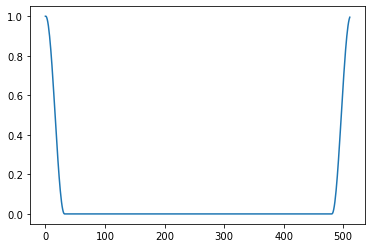

In [52]:
plt.plot(fftbuffer) # this is how windows are place

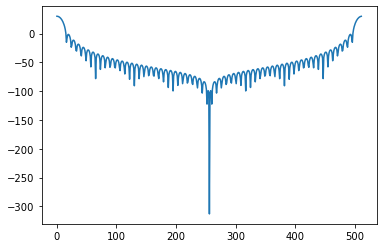

In [53]:
plt.plot(mX)

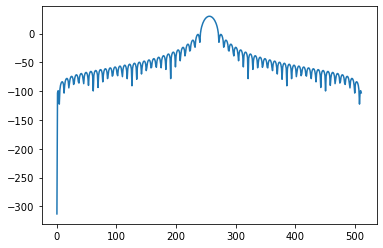

In [54]:
plt.plot(mX1)

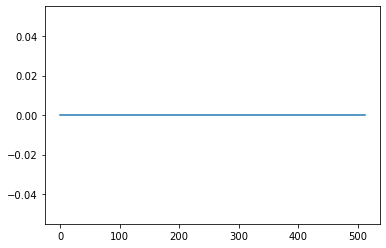

In [55]:
plt.plot(pX)

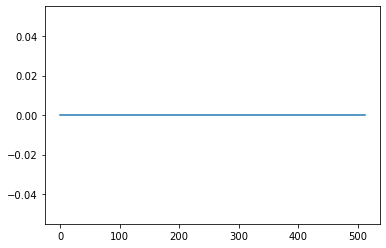

In [56]:
plt.plot(pX1)

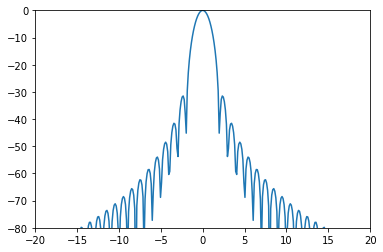

In [57]:
# to visualize main lobe width 
plt.plot(np.arange(-hN,hN)/float(N)*M,mX1-max(mX1))
plt.axis([-20,20,-80,0])
plt.show()

# Main lobe width = 4bins
# side lobe level = -31decibels

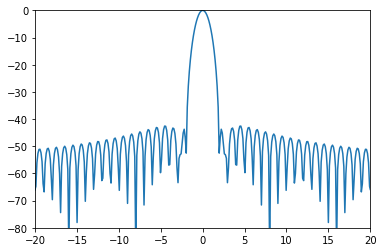

In [58]:
# Window - Hamming

# create a window
M=63
window = get_window("hamming",M)
hm1 = int(math.floor((M+1)/2))
hm2= int(math.floor(M/2))


# create an FFT buffer so that you can place the signal at the middle
N=512
hN= int(N/2)
fftbuffer = np.zeros(N)
 
fftbuffer[:hm1]= window[hm2:]  # second half of window place it at begining
fftbuffer[N-hm2:]= window[:hm2] # first half at the end and zero padding in between


# compute fft 
X = fft(fftbuffer)
absx= abs(X)
absx[absx<np.finfo(float).eps] = np.finfo(float).eps  # ensure there are no zeros coz we want to take log
mX = 20*np.log10(absx) # decibels
pX = np.angle(absx)


# to display it properly we undo zero padding and place it in the middle

mX1= np.zeros(N)
pX1= np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN:] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN:] = pX[:hN]


#plt.plot(window) 

#plt.plot(fftbuffer) # this is how windows are place

#plt.plot(mX)

#plt.plot(mX1)

#plt.plot(pX)

#plt.plot(pX1)

# to visualize main lobe width 
plt.plot(np.arange(-hN,hN)/float(N)*M,mX1-max(mX1))
plt.axis([-20,20,-80,0])
plt.show()

# Main lobe width = 4bins
# side lobe level = -42decibels  ( for hamming side lobe is very low)

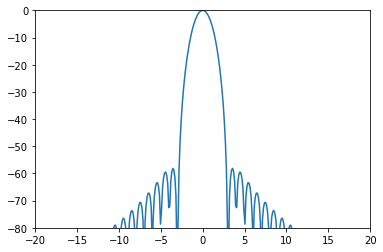

In [59]:
# Window - Blackman

# create a window
M=63
window = get_window("blackman",M)
hm1 = int(math.floor((M+1)/2))
hm2= int(math.floor(M/2))


# create an FFT buffer so that you can place the signal at the middle
N=512
hN= int(N/2)
fftbuffer = np.zeros(N)
 
fftbuffer[:hm1]= window[hm2:]  # second half of window place it at begining
fftbuffer[N-hm2:]= window[:hm2] # first half at the end and zero padding in between


# compute fft 
X = fft(fftbuffer)
absx= abs(X)
absx[absx<np.finfo(float).eps] = np.finfo(float).eps  # ensure there are no zeros coz we want to take log
mX = 20*np.log10(absx) # decibels
pX = np.angle(absx)


# to display it properly we undo zero padding and place it in the middle

mX1= np.zeros(N)
pX1= np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN:] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN:] = pX[:hN]


#plt.plot(window) 

#plt.plot(fftbuffer) # this is how windows are place

#plt.plot(mX)

#plt.plot(mX1)

#plt.plot(pX)

#plt.plot(pX1)

# to visualize main lobe width 
plt.plot(np.arange(-hN,hN)/float(N)*M,mX1-max(mX1))
plt.axis([-20,20,-80,0])
plt.show()

# Main lobe width = 6bins
# side lobe level = -58decibels  ( for hamming side lobe is very low)

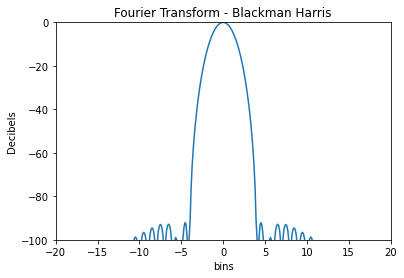

In [60]:
# Window - Blackman Harris

# create a window
M=63
window = get_window("blackmanharris",M)
hm1 = int(math.floor((M+1)/2))
hm2= int(math.floor(M/2))


# create an FFT buffer so that you can place the signal at the middle
N=512
hN= int(N/2)
fftbuffer = np.zeros(N)
 
fftbuffer[:hm1]= window[hm2:]  # second half of window place it at begining
fftbuffer[N-hm2:]= window[:hm2] # first half at the end and zero padding in between


# compute fft 
X = fft(fftbuffer)
absx= abs(X)
absx[absx<np.finfo(float).eps] = np.finfo(float).eps  # ensure there are no zeros coz we want to take log
mX = 20*np.log10(absx) # decibels
pX = np.angle(absx)


# to display it properly we undo zero padding and place it in the middle

mX1= np.zeros(N)
pX1= np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN:] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN:] = pX[:hN]


#plt.plot(window) 

#plt.plot(fftbuffer) # this is how windows are place

#plt.plot(mX)

#plt.plot(mX1)

#plt.plot(pX)

#plt.plot(pX1)

# to visualize main lobe width 
plt.plot(np.arange(-hN,hN)/float(N)*M,mX1-max(mX1))
plt.axis([-20,20,-100,0])
plt.xlabel ("bins")
plt.ylabel ("Decibels")
plt.title('Fourier Transform - Blackman Harris')
plt.show()

# Main lobe width = 8bins
# side lobe level = -90 decibels

# Windowing on Sinusodial

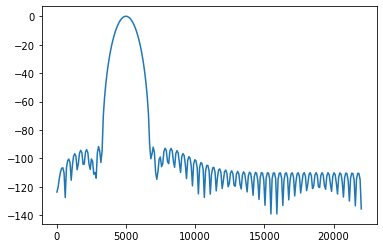

In [61]:
fs= 44100
f= 5000
M=101  # window size
x= np.cos(2*np.pi*f*np.arange(M)/float(fs))

N=512 # dft size
w= get_window("blackmanharris",M)
mX, pX = dftAnal(x,w,N)

# plot the sinusoid
plt.plot(np.arange(0,fs/2,fs/float(N+1)),mX-max(mX))
plt.show()

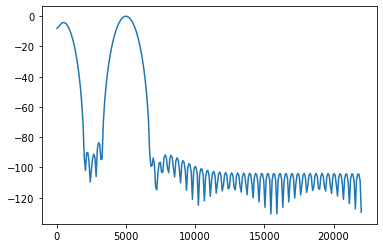

In [62]:
# WHAT if there are two sinewaves
fs= 44100
f= 5000
M=101  # window size
x= np.cos(2*np.pi*f*np.arange(M)/float(fs))+np.cos(2*np.pi*250*np.arange(M)/float(fs)) #added another sinusoidal at freq of 250hz

N=512 # dft size
w= get_window("blackmanharris",M)
mX, pX = dftAnal(x,w,N)

# plot the sinusoid
plt.plot(np.arange(0,fs/2,fs/float(N+1)),mX-max(mX))
plt.show()

# Short time fourier transform STFT

In [63]:
def stft(x, w, N, H):
	"""
	Analysis/synthesis of a sound using the short-time Fourier transform
	x: input sound, w: analysis window, N: FFT size, H: hop size
	returns y: output sound
	"""
	
	if (H <= 0):                                   # raise error if hop size 0 or negative
		raise ValueError("Hop size (H) smaller or equal to 0")
		
	M = w.size                                     # size of analysis window
	hM1 = (M+1)//2                                 # half analysis window size by rounding
	hM2 = M//2                                     # half analysis window size by floor
	x = np.append(np.zeros(hM2),x)                 # add zeros at beginning to center first window at sample 0
	x = np.append(x,np.zeros(hM1))                 # add zeros at the end to analyze last sample
	pin = hM1                                      # initialize sound pointer in middle of analysis window       
	pend = x.size-hM1                              # last sample to start a frame
	w = w / sum(w)                                 # normalize analysis window
	y = np.zeros(x.size)                           # initialize output array
	while pin<=pend:                               # while sound pointer is smaller than last sample      
	#-----analysis-----  
		x1 = x[pin-hM1:pin+hM2]                    # select one frame of input sound
		mX, pX = dftAnal(x1, w, N)             # compute dft
	#-----synthesis-----
		y1 = dftSynth(mX, pX, M)               # compute idft
		y[pin-hM1:pin+hM2] += H*y1                 # overlap-add to generate output sound
		pin += H                                   # advance sound pointer
	y = np.delete(y, range(hM2))                   # delete half of first window which was added in stftAnal
	y = np.delete(y, range(y.size-hM1, y.size))    # delete half of the last window which as added in stftAnal
	return y

def stftAnal(x, w, N, H) :
	"""
	Analysis of a sound using the short-time Fourier transform
	x: input array sound, w: analysis window, N: FFT size, H: hop size
	returns xmX, xpX: magnitude and phase spectra
	"""
	if (H <= 0):                                   # raise error if hop size 0 or negative
		raise ValueError("Hop size (H) smaller or equal to 0")
		
	M = w.size                                      # size of analysis window
	hM1 = (M+1)//2                                  # half analysis window size by rounding
	hM2 = M//2                                      # half analysis window size by floor
	x = np.append(np.zeros(hM2),x)                  # add zeros at beginning to center first window at sample 0
	x = np.append(x,np.zeros(hM2))                  # add zeros at the end to analyze last sample
	pin = hM1                                       # initialize sound pointer in middle of analysis window       
	pend = x.size-hM1                               # last sample to start a frame
	w = w / sum(w)                                  # normalize analysis window
	xmX = []                                       # Initialise empty list for mX
	xpX = []                                       # Initialise empty list for pX
	while pin<=pend:                                # while sound pointer is smaller than last sample      
		x1 = x[pin-hM1:pin+hM2]                     # select one frame of input sound
		mX, pX = dftAnal(x1, w, N)              # compute dft
		xmX.append(np.array(mX))                    # Append output to list
		xpX.append(np.array(pX))
		pin += H                                    # advance sound pointer
	xmX = np.array(xmX)                             # Convert to numpy array
	xpX = np.array(xpX)
	return xmX, xpX

def stftSynth(mY, pY, M, H) :
	"""
	Synthesis of a sound using the short-time Fourier transform
	mY: magnitude spectra, pY: phase spectra, M: window size, H: hop-size
	returns y: output sound
	"""
	hM1 = (M+1)//2                                   # half analysis window size by rounding
	hM2 = M//2                                       # half analysis window size by floor
	nFrames = mY[:,0].size                           # number of frames
	y = np.zeros(nFrames*H + hM1 + hM2)              # initialize output array
	pin = hM1                  
	for i in range(nFrames):                         # iterate over all frames      
		y1 = dftSynth(mY[i,:], pY[i,:], M)       # compute idft
		y[pin-hM1:pin+hM2] += H*y1                   # overlap-add to generate output sound
		pin += H                                     # advance sound pointer
	y = np.delete(y, range(hM2))                     # delete half of first window which was added in stftAnal
	y = np.delete(y, range(y.size-hM1, y.size))      # delete the end of the sound that was added in stftAnal
	return y


In [64]:
# Lets use the above STFT functions

window = 'hamming'
M=801
N=1024
H= 400

fs,x = wavread("for_experiment.wav")

w= get_window(window,M)
mX,pX = stftAnal(x,w,N,H)

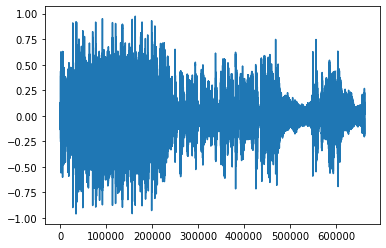

In [65]:
plt.plot(x)

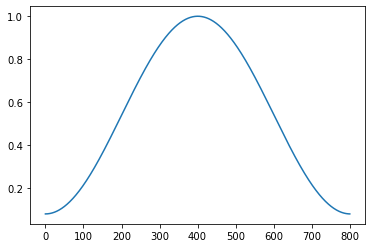

In [66]:
plt.plot(w)

In [67]:
mX.shape # 1655 frames and 513 samples

(1655, 513)

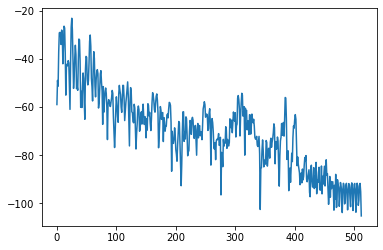

In [68]:
#plot a frame
plt.plot(mX[50,:])

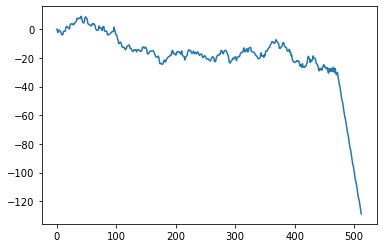

In [69]:
#plot a frame phas
plt.plot(pX[50,:])

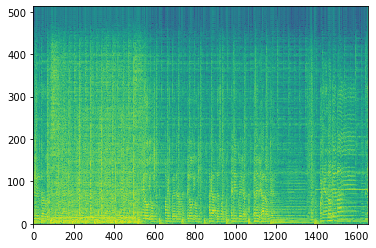

In [70]:
#plotting the entire spectrum
plt.pcolormesh(mX.T) # transpose so that vertical is time

In [71]:
# the function for STFT

def main_STFT(inputFile = 'for_experiment.wav', window = 'hamming', M = 1024, N = 1024, H = 512):
	"""
	analysis/synthesis using the STFT
	inputFile: input sound file (monophonic with sampling rate of 44100)
	window: analysis window type (choice of rectangular, hanning, hamming, blackman, blackmanharris)
	M: analysis window size
	N: fft size (power of two, bigger or equal than M)
	H: hop size (at least 1/2 of analysis window size to have good overlap-add)
	"""

	# read input sound (monophonic with sampling rate of 44100)
	fs, x = wavread(inputFile)

	# compute analysis window
	w = get_window(window, M)

	# compute the magnitude and phase spectrogram

	mX, pX = stftAnal(x, w, N, H)
	 
	# perform the inverse stft
	y = stftSynth(mX, pX, M, H)

	# output sound file (monophonic with sampling rate of 44100)
	outputFile = inputFile[:-4] + '_stft.wav'

	# write the sound resulting from the inverse stft
	wavwrite(y, fs, outputFile)

	# create figure to plot
	plt.figure(figsize=(9, 6))

	# frequency range to plot
	maxplotfreq = 5000.0

	# plot the input sound
	plt.subplot(4,1,1)
	plt.plot(np.arange(x.size)/float(fs), x)
	plt.axis([0, x.size/float(fs), min(x), max(x)])
	plt.ylabel('amplitude')
	plt.xlabel('time (sec)')
	plt.title('input sound: x')

	# plot magnitude spectrogram
	plt.subplot(4,1,2)
	numFrames = int(mX[:,0].size)
	frmTime = H*np.arange(numFrames)/float(fs)
	binFreq = fs*np.arange(N*maxplotfreq/fs)/N
	plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
	plt.xlabel('time (sec)')
	plt.ylabel('frequency (Hz)')
	plt.title('magnitude spectrogram')
	plt.autoscale(tight=True)

	# plot the phase spectrogram
	plt.subplot(4,1,3)
	numFrames = int(pX[:,0].size)
	frmTime = H*np.arange(numFrames)/float(fs)
	binFreq = fs*np.arange(N*maxplotfreq/fs)/N
	plt.pcolormesh(frmTime, binFreq, np.transpose(np.diff(pX[:,:int(N*maxplotfreq/fs+1)],axis=1)))
	plt.xlabel('time (sec)')
	plt.ylabel('frequency (Hz)')
	plt.title('phase spectrogram (derivative)')
	plt.autoscale(tight=True)

	# plot the output sound
	plt.subplot(4,1,4)
	plt.plot(np.arange(y.size)/float(fs), y)
	plt.axis([0, y.size/float(fs), min(y), max(y)])
	plt.ylabel('amplitude')
	plt.xlabel('time (sec)')
	plt.title('output sound: y')

	plt.tight_layout()
	plt.ion()
	plt.show()

<ipython-input-71-26ca8033b985>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
<ipython-input-71-26ca8033b985>:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(frmTime, binFreq, np.transpose(np.diff(pX[:,:int(N*maxplotfreq/fs+1)],axis=1)))


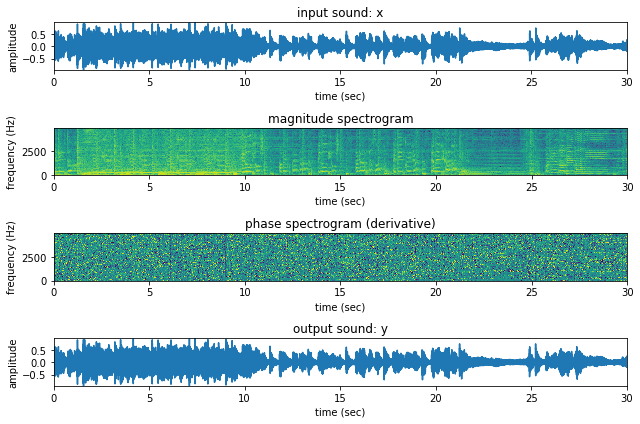

In [72]:
main_STFT()